<a href="https://colab.research.google.com/github/elango-ela/Recommendation-system/blob/main/Settyl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np

from sklearn.preprocessing import StandardScaler

In [ ]:
a= '/content/BX-Book-Ratings.csv'
b= '/content/BX-Users.csv'
c= '/content/BX-Books.csv'

ratings = pd.read_csv(a, encoding='latin1', on_bad_lines='skip', delimiter=';')
users   = pd.read_csv(b, encoding='latin1', on_bad_lines='skip', delimiter=';')
books = pd.read_csv(c, encoding='latin1', on_bad_lines='skip', delimiter=';')

<ipython-input-4-36649971ecdf>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(c, encoding='latin1', on_bad_lines='skip', delimiter=';')


In [ ]:
print(len(ratings))
print(len(books))
print(len(users))

1149780
271360
278858


In [ ]:
df=ratings.merge(books,on='ISBN')

df=df.merge(users,on='User-ID')

#final DF
df.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",NaN
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0


In [ ]:
# Drop the URL columns
df = df.drop(columns=['Book-Title','Image-URL-S', 'Image-URL-M', 'Image-URL-L','Location'])
df=df.dropna()
df.head(2)

,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Age
2,276727,0446520802,0,Nicholas Sparks,1996,Warner Books,16.0
3,276729,052165615X,3,Philip Prowse,1999,Cambridge University Press,16.0


In [ ]:
df['ISBN'] = df['ISBN'].str.strip()  # Remove leading/trailing spaces

df= df[df['ISBN'].str.isdigit()]  # Keep rows with numeric ISBN only


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691154 entries, 2 to 1031135
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              691154 non-null  int64  
 1   ISBN                 691154 non-null  object 
 2   Book-Rating          691154 non-null  int64  
 3   Book-Author          691154 non-null  object 
 4   Year-Of-Publication  691154 non-null  object 
 5   Publisher            691154 non-null  object 
 6   Age                  691154 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 42.2+ MB


In [ ]:
print(len(df))

691154


In [ ]:
df

,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Age
2,276727,0446520802,0,Nicholas Sparks,1996,Warner Books,16.0
4,276729,0521795028,6,Sue Leather,2001,Cambridge University Press,16.0
5,276733,2080674722,0,Michel Houellebecq,1998,Flammarion,37.0
13,276747,0060517794,9,Rebecca Wells,2003,HarperTorch,25.0
14,276747,0451192001,0,Terry McMillan,1997,Signet Book,25.0
...,...,...,...,...,...,...,...
1031114,276690,0590581066,0,Debbie Dadey,1996,Scholastic Paperbacks,43.0
1031115,276690,0590907301,0,Debbie Dadey,1997,Apple,43.0
1031133,276706,0679447156,0,Andrew Weil,1997,Alfred A. Knopf,18.0
1031134,276709,0515107662,10,Catherine Coulter,1996,Jove Books,38.0


In [ ]:
# Display the number of unique values in each column
unique_counts = df.nunique()
print(unique_counts)


User-ID                 51592
ISBN                   210293
Book-Rating                11
Book-Author             82329
Year-Of-Publication       185
Publisher               13821
Age                       140
dtype: int64


In [ ]:
df

,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Age
2,276727,0446520802,0,Nicholas Sparks,1996,Warner Books,16.0
4,276729,0521795028,6,Sue Leather,2001,Cambridge University Press,16.0
5,276733,2080674722,0,Michel Houellebecq,1998,Flammarion,37.0
13,276747,0060517794,9,Rebecca Wells,2003,HarperTorch,25.0
14,276747,0451192001,0,Terry McMillan,1997,Signet Book,25.0
...,...,...,...,...,...,...,...
1031114,276690,0590581066,0,Debbie Dadey,1996,Scholastic Paperbacks,43.0
1031115,276690,0590907301,0,Debbie Dadey,1997,Apple,43.0
1031133,276706,0679447156,0,Andrew Weil,1997,Alfred A. Knopf,18.0
1031134,276709,0515107662,10,Catherine Coulter,1996,Jove Books,38.0


In [ ]:
df['Book-Rating'].unique()

array([ 0,  6,  9,  8,  7,  5, 10,  1,  3,  4,  2])

In [ ]:
# Tokenizing Publisher (Label Encoding)
df['Publisher'] = df['Publisher'].astype('category').cat.codes
df['Book-Author']= df['Book-Author'].astype('category').cat.codes

In [ ]:
# Convert columns to numeric, if any errors occur they will be turned into NaN
df['User-ID'] = pd.to_numeric(df['User-ID'], errors='coerce')
df['Book-Author'] = pd.to_numeric(df['Book-Author'], errors='coerce')
df['Year-Of-Publication'] = pd.to_numeric(df['Year-Of-Publication'], errors='coerce')
df['Publisher'] = pd.to_numeric(df['Publisher'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Check for any missing values
print(df.isnull().sum())
df.dropna()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Author            0
Year-Of-Publication    1
Publisher              0
Age                    0
dtype: int64


,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Age
2,276727,0446520802,0,58694,1996.0,13113,16.0
4,276729,0521795028,6,74463,2001.0,2144,16.0
5,276733,2080674722,0,56169,1998.0,4493,37.0
13,276747,0060517794,9,65202,2003.0,5541,25.0
14,276747,0451192001,0,76353,1997.0,11251,25.0
...,...,...,...,...,...,...,...
1031114,276690,0590581066,0,17551,1996.0,10962,43.0
1031115,276690,0590907301,0,17551,1997.0,690,43.0
1031133,276706,0679447156,0,3219,1997.0,385,18.0
1031134,276709,0515107662,10,11167,1996.0,6608,38.0


In [ ]:
df.head(2)

,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Age
2,276727,0446520802,0,58694,1996.0,13113,16.0
4,276729,0521795028,6,74463,2001.0,2144,16.0


In [ ]:
x = df[['User-ID','Book-Author', 'Year-Of-Publication', 'Publisher', 'Age']]
y = df['Book-Rating']

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
x_train[:3]

,User-ID,Book-Author,Year-Of-Publication,Publisher,Age
512603,137589,9753,1998.0,12929,35.0
98868,26053,14650,1999.0,10940,14.0
108702,28467,78171,2001.0,9721,37.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the model with default parameters
model = RandomForestClassifier(random_state=42)

# Fit the model using training data
print("Training RandomForestClassifier with default parameters...")
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
print("\nAccuracy Score for RandomForestClassifier:")
print(accuracy_score(y_test, y_pred))



Training RandomForestClassifier with default parameters...

Accuracy Score for RandomForestClassifier:
0.6509972437441673


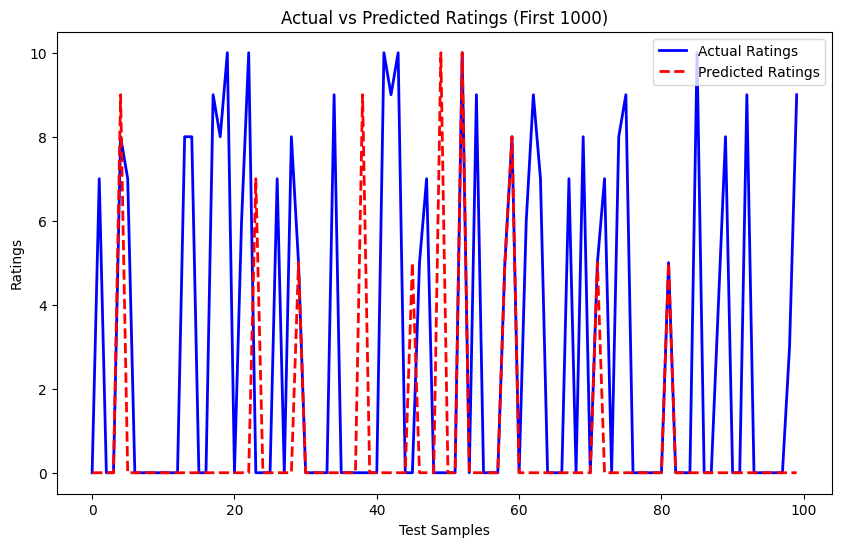

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Round the predicted ratings to nearest whole numbers (classes)
y_pred_rounded = np.round(y_pred[:100])  # Round predictions to nearest integer (class)

# Step 2: Ensure predictions are within valid class range (0-10 or whatever your class range is)
y_pred_rounded = np.clip(y_pred_rounded, 0, 10)  # Example: Assuming ratings are between 0 and 10

# Step 3: Create a line plot for first 1000 samples
plt.figure(figsize=(10, 6))

# Plotting the actual ratings (y_test) and predicted ratings (y_pred_rounded) as line plots
plt.plot(np.arange(100), y_test[:100], label='Actual Ratings', color='blue', linewidth=2)
plt.plot(np.arange(100), y_pred_rounded, label='Predicted Ratings', color='red', linestyle='--', linewidth=2)

# Set labels and title
plt.xlabel('Test Samples')
plt.ylabel('Ratings')
plt.title('Actual vs Predicted Ratings (First 1000)')

# Add a legend to differentiate between the two lines
plt.legend()

# Show the plot
plt.show()


In [ ]:
import pandas as pd

def recommend_books(user_id, df, model):
    # Step 1: Extract books already rated by the user
    user_books = df[df['User-ID'] == user_id]
    user_rated_books = user_books['ISBN'].tolist()

    # Step 2: Filter out books that the user has already rated
    unrated_books = df[~df['ISBN'].isin(user_rated_books)]  # Books the user hasn't rated

    # Step 3: Attach the user-specific data (User-ID, Age) to each unrated book
    user_data = df[df['User-ID'] == user_id][['User-ID', 'Age']].iloc[0]  # Get the specific user info

    # Use .loc to safely assign values
    unrated_books.loc[:, 'User-ID'] = user_data['User-ID']  # Add User-ID
    unrated_books.loc[:, 'Age'] = user_data['Age']  # Add Age

    # Step 4: Prepare features for prediction (without User-ID as it's now part of the DataFrame)
    unrated_books_features = unrated_books[['User-ID', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Age']]

    # Step 5: Predict ratings for unrated books
    unrated_books['Predicted-Rating'] = model.predict(unrated_books_features)

    # Step 6: Sort books by predicted rating and return top 5 recommendations
    recommendations = unrated_books.sort_values('Predicted-Rating', ascending=False).head(5)

    return recommendations[['User-ID', 'ISBN', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Age', 'Predicted-Rating']]

# Example usage for user ID 35051
recommendations = recommend_books(user_id=32773	, df=df, model=model)
print(recommendations)

        User-ID        ISBN  Book-Author  Year-Of-Publication  Publisher  \
370380    32773  0446608955        58694               2000.0      13113   
298512    32773  0836218620         7815               1990.0        625   
415141    32773  0451527127        81467               1998.0      11251   
298501    32773  0836217691         7815               1994.0        625   
987565    32773  0441172717        24985               1996.0         94   

         Age  Predicted-Rating  
370380  28.0                10  
298512  28.0                10  
415141  28.0                10  
298501  28.0                10  
987565  28.0                10  


<ipython-input-23-cf857f507af7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unrated_books['Predicted-Rating'] = model.predict(unrated_books_features)
